# Multi-qa-MiniLM-L6-cos-v1 Model for Cosine Similarity 

Using multi-qa-MiniLM-L6-cos-v1 model embeddings to find a representative word embedding of trivial and non-trivial messages (from the training sentences). Classify each new sentence based on the Euclidean distance from the representative embeddings.

In [1]:
import torch
from sentence_transformers import SentenceTransformer

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

from scipy.spatial.distance import cosine

2023-05-20 16:12:38.867802: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = SentenceTransformer('sentence-transformers/multi-qa-MiniLM-L6-cos-v1')

In [81]:
# Load pre-trained model tokenizer (vocabulary)
spam_df = pd.read_excel('../../src/data/spam.xlsx')
checkmate_df = pd.read_csv('../../src/data/CM_MSG_T_20MAY2023.csv')
checkmate_df['is_trivial'] = (checkmate_df['taggedCategory']=='Trivial')
checkmate_df['text'] = checkmate_df['text'].astype('str')

# Remove empty rows
spam_df = spam_df.iloc[:, 1:3]
spam_df.columns = ['text', 'is_trivial']
spam_df['text'] = spam_df['text'].astype('str')

In [82]:
checkmate_df_train, checkmate_df_test = train_test_split(checkmate_df, test_size=0.2, stratify=checkmate_df['is_trivial'])
print(len(checkmate_df_train))
print(len(checkmate_df_test))

160
41


## Representative Vector - 20% 

In [83]:
# separate the sentence embeddings of non trivial and trivial messages
checkmate_df_train_not_trivial = checkmate_df_train[checkmate_df_train['is_trivial'] == False]
checkmate_df_train_trivial = checkmate_df_train[checkmate_df_train['is_trivial'] == True]

In [89]:
checkmate_df_train_not_trivial['embedding'] = checkmate_df_train_not_trivial['text'].apply(lambda x: model.encode(x))
checkmate_df_train_trivial['embedding'] = checkmate_df_train_trivial['text'].apply(lambda x: model.encode(x))

/var/folders/1v/_nnjhmhj2fz8d8dg63jpvjf80000gp/T/ipykernel_5197/971635697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkmate_df_train_not_trivial['embedding'] = checkmate_df_train_not_trivial['text'].apply(lambda x: model.encode(x))
/var/folders/1v/_nnjhmhj2fz8d8dg63jpvjf80000gp/T/ipykernel_5197/971635697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkmate_df_train_trivial['embedding'] = checkmate_df_train_trivial['text'].apply(lambda x: model.encode(x))


In [97]:
test = checkmate_df_train_not_trivial['embedding']
test.iloc[1].shape

(384,)

In [98]:
# create tensors from the series spam_df_train['sentence_embedding]
tensor_train_not_trivial = torch.tensor(checkmate_df_train_not_trivial['embedding'].tolist())
tensor_train_trivial = torch.tensor(checkmate_df_train_trivial['embedding'].tolist())

In [99]:
print(tensor_train_not_trivial)
print((tensor_train_not_trivial.shape))
print(type(tensor_train_not_trivial))

tensor([[ 0.0104,  0.0513, -0.0733,  ..., -0.0287,  0.0313,  0.0456],
        [ 0.0412,  0.0228,  0.0021,  ...,  0.0129, -0.0633, -0.0178],
        [-0.0070, -0.0092, -0.0650,  ...,  0.0425,  0.0249, -0.0973],
        ...,
        [ 0.0265, -0.0204, -0.0964,  ..., -0.0189, -0.0992,  0.0342],
        [-0.0023, -0.0052,  0.0062,  ...,  0.0407, -0.0183, -0.0835],
        [ 0.0137,  0.1384, -0.0305,  ...,  0.0893, -0.0176,  0.0002]])
torch.Size([124, 384])
<class 'torch.Tensor'>


In [100]:
# create a representative tensor of size [1,768] for non-trivial and trivial
rep_not_trivial = torch.mean(tensor_train_not_trivial, dim=0)
rep_trivial = torch.mean(tensor_train_trivial, dim=0)

In [101]:
rep_not_trivial

tensor([-2.2411e-02,  2.8574e-03, -7.6717e-04,  1.9762e-02, -2.8490e-04,
         1.9163e-02,  1.9291e-02, -5.0428e-03, -1.5502e-02, -1.0314e-02,
         2.6871e-02, -4.7046e-02,  6.5064e-03, -8.2068e-03,  8.5684e-03,
        -7.6962e-03,  3.8827e-03, -4.2006e-02, -1.4271e-02, -1.9767e-02,
        -3.7038e-02, -1.8301e-02, -9.5627e-03,  2.3351e-02,  3.5798e-02,
        -8.8627e-03,  3.0970e-04, -9.8118e-03,  9.4221e-03, -4.7268e-04,
         5.6529e-03,  2.7667e-02, -7.2766e-03,  1.5745e-02,  2.5548e-02,
         1.3222e-02,  5.9898e-03, -2.0170e-02, -9.7731e-03,  4.7385e-03,
        -4.1301e-03, -4.6831e-02, -6.7208e-03,  6.0489e-03,  4.0435e-02,
        -5.6003e-03, -7.9963e-03,  1.5339e-02, -4.7224e-03,  1.5969e-02,
         7.8810e-03, -1.3747e-02,  2.1539e-03,  1.8777e-02, -3.9860e-03,
        -3.7446e-03, -1.4187e-02, -2.1347e-02,  6.5117e-03,  4.5184e-04,
        -4.8815e-04, -5.9110e-03, -9.5222e-03,  6.6568e-03, -2.3713e-02,
         7.1044e-03, -4.5445e-02,  2.8230e-03,  2.2

In [102]:
rep_not_trivial.shape
rep_trivial.shape

torch.Size([384])

### Evaluate Result for checkmate_df_test - 80%

In [103]:
checkmate_df_test['embedding'] = checkmate_df_test['text'].apply(lambda x: model.encode(x))

In [104]:
checkmate_df_test['distance_from_not_trivial'] = checkmate_df_test['embedding'].apply(lambda x: cosine(rep_not_trivial, x))
checkmate_df_test['distance_from_trivial'] = checkmate_df_test['embedding'].apply(lambda x: cosine(rep_trivial, x))

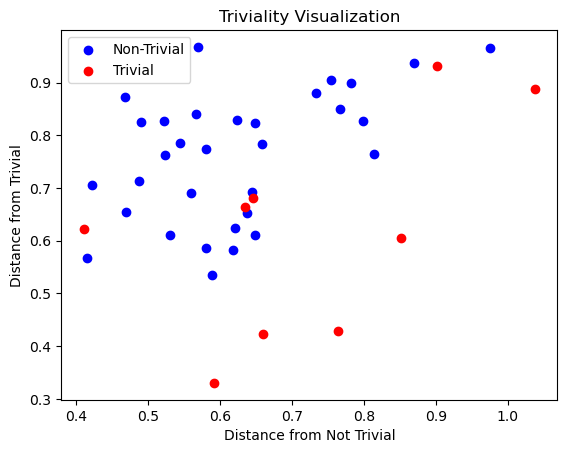

<Figure size 800x600 with 0 Axes>

In [106]:
# Visualise the distances in a graph

# Scatter plot
trivial_points = checkmate_df_test[checkmate_df_test['is_trivial'] == 1]
non_trivial_points = checkmate_df_test[checkmate_df_test['is_trivial'] == 0]

# Scatter plot for non-trivial points (on top)
plt.scatter(non_trivial_points['distance_from_not_trivial'], non_trivial_points['distance_from_trivial'], c='blue', label='Non-Trivial')

# Scatter plot for trivial points (below non-trivial points)
plt.scatter(trivial_points['distance_from_not_trivial'], trivial_points['distance_from_trivial'], c='red', label='Trivial')

# Add labels and title
plt.xlabel('Distance from Not Trivial')
plt.ylabel('Distance from Trivial')
plt.title('Triviality Visualization')

# Set legend
plt.legend()

# Increase the figure size
plt.figure(figsize=(8, 6))

# Display the plot
plt.show()

In [108]:
checkmate_df_test[checkmate_df_test['is_trivial']==1]
''' Out of 9 trivial
4 were wrongly classified, would have placed them in non-trivial
- Is it true that Norway is expensive
- Sending a note to myself to stresstest the scam bot! Visit www.thisisascan.com and provide your NRIC and payment details
- Excuse me, this is Stella, have you arranged a vehicle to pick up someone from Changi Airport tomorrow?
- FYI, please. Please kindly adhere to the ETA (Estimated Time of Arrival) strictly.  There must be someone to receive gong gong. We don't want the driver/escort service to complain to St Luke's HQ and the HQ to deny us of escort service. Thanks much!
'''

,text,taggedCategory,type,isMachineCategorised,truthScore,is_trivial,embedding,distance_from_not_trivial,distance_from_trivial
21,Is it true that Norway is expensive,Trivial,text,False,3.666667,True,"[0.049945656, 0.082472265, -0.044704907, 0.016...",0.901400,0.930768
59,Lol. 👌,Trivial,text,True,NaN,True,"[0.07249006, 0.019982185, 0.046596218, 0.04492...",0.763359,0.428569
64,Thanks 🙏,Trivial,text,True,NaN,True,"[-0.019107847, 0.079083316, 0.109078854, 0.037...",0.591829,0.330326
71,this is a test,Trivial,text,True,NaN,True,"[0.031896178, 0.03253631, -0.07427739, 0.05187...",0.851357,0.604454
166,Sending a note to myself to stresstest the sca...,Trivial,text,False,NaN,True,"[-0.09815832, -0.025841225, -0.09299754, 0.014...",0.410469,0.622199
2,Well done CheckMate 👏👏👏,Trivial,text,False,5.000000,True,"[0.068484455, 0.0046824925, 0.015939692, 0.043...",0.659260,0.422441
157,"Excuse me, this is Stella, have you arranged a...",Trivial,text,False,NaN,True,"[0.014589502, -0.0004910951, 0.073982984, 0.06...",0.634021,0.663431
133,What does accurate mean,Trivial,text,False,NaN,True,"[0.0049395063, -0.019777024, 0.005979511, 0.04...",1.037392,0.887866
94,"FYI, please. Please kindly adhere to the ETA (...",Trivial,image,False,NaN,True,"[0.012434565, 0.075065315, 0.06142999, -0.0333...",0.645084,0.680275


### Evaluate Result for checkmate_df - 100%

In [109]:
checkmate_df['embedding'] = checkmate_df['text'].apply(lambda x: model.encode(x))

In [110]:
checkmate_df['distance_from_not_trivial'] = checkmate_df['embedding'].apply(lambda x: cosine(rep_not_trivial, x))
checkmate_df['distance_from_trivial'] = checkmate_df['embedding'].apply(lambda x: cosine(rep_trivial, x))

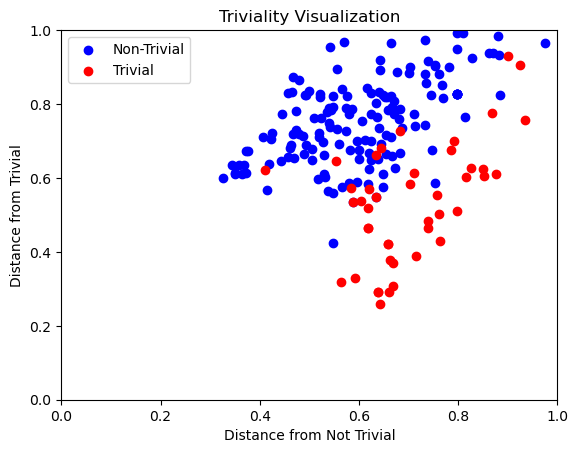

<Figure size 800x600 with 0 Axes>

In [113]:
# Visualise the distances in a graph

# Scatter plot
trivial_points = checkmate_df[checkmate_df['is_trivial'] == 1]
non_trivial_points = checkmate_df[checkmate_df['is_trivial'] == 0]

# Scatter plot for non-trivial points (on top)
plt.scatter(non_trivial_points['distance_from_not_trivial'], non_trivial_points['distance_from_trivial'], c='blue', label='Non-Trivial')

# Scatter plot for trivial points (below non-trivial points)
plt.scatter(trivial_points['distance_from_not_trivial'], trivial_points['distance_from_trivial'], c='red', label='Trivial')

# Add labels and title
plt.xlabel('Distance from Not Trivial')
plt.ylabel('Distance from Trivial')
plt.title('Triviality Visualization')


# Set the same scale for x-axis and y-axis
plt.xlim(0, 1)
plt.ylim(0, 1)

# Set legend
plt.legend()

# Increase the figure size
plt.figure(figsize=(8, 6))

# Display the plot
plt.show()

In [115]:
spam_df['embedding'] = spam_df['text'].apply(lambda x: model.encode(x))

In [116]:
spam_df['distance_from_not_trivial'] = spam_df['embedding'].apply(lambda x: cosine(rep_not_trivial, x))
spam_df['distance_from_trivial'] = spam_df['embedding'].apply(lambda x: cosine(rep_trivial, x))

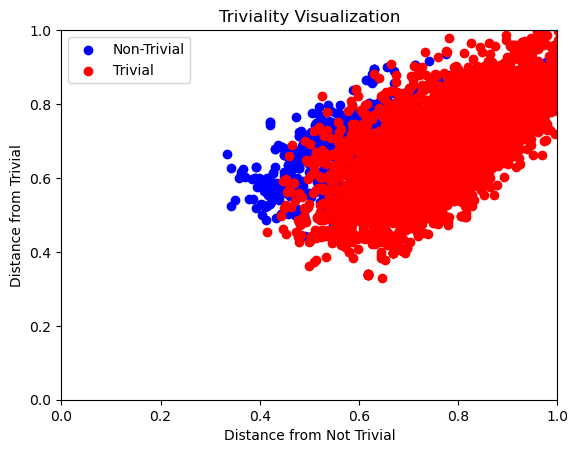

<Figure size 800x600 with 0 Axes>

In [117]:
# Visualise the distances in a graph

# Scatter plot
trivial_points = spam_df[spam_df['is_trivial'] == 1]
non_trivial_points = spam_df[spam_df['is_trivial'] == 0]

# Scatter plot for non-trivial points (on top)
plt.scatter(non_trivial_points['distance_from_not_trivial'], non_trivial_points['distance_from_trivial'], c='blue', label='Non-Trivial')

# Scatter plot for trivial points (below non-trivial points)
plt.scatter(trivial_points['distance_from_not_trivial'], trivial_points['distance_from_trivial'], c='red', label='Trivial')

# Add labels and title
plt.xlabel('Distance from Not Trivial')
plt.ylabel('Distance from Trivial')
plt.title('Triviality Visualization')


# Set the same scale for x-axis and y-axis
plt.xlim(0, 1)
plt.ylim(0, 1)

# Set legend
plt.legend()

# Increase the figure size
plt.figure(figsize=(8, 6))

# Display the plot
plt.show()

## Representative Vector - 100%

In [134]:
# separate the sentence embeddings of non trivial and trivial messages
checkmate_df_not_trivial = checkmate_df[checkmate_df['is_trivial'] == False]
checkmate_df_trivial = checkmate_df[checkmate_df['is_trivial'] == True]

In [135]:
checkmate_df_not_trivial['embedding'] = checkmate_df_not_trivial['text'].apply(lambda x: model.encode(x))
checkmate_df_trivial['embedding'] = checkmate_df_trivial['text'].apply(lambda x: model.encode(x))

/var/folders/1v/_nnjhmhj2fz8d8dg63jpvjf80000gp/T/ipykernel_5197/1386408850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkmate_df_not_trivial['embedding'] = checkmate_df_not_trivial['text'].apply(lambda x: model.encode(x))
/var/folders/1v/_nnjhmhj2fz8d8dg63jpvjf80000gp/T/ipykernel_5197/1386408850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkmate_df_trivial['embedding'] = checkmate_df_trivial['text'].apply(lambda x: model.encode(x))


In [138]:
test = checkmate_df_not_trivial['embedding']
test.iloc[1].shape

(384,)

In [142]:
# create tensors from the series spam_df_train['sentence_embedding]
tensor_train_not_trivial = torch.tensor(checkmate_df_not_trivial['embedding'].tolist())
tensor_train_trivial = torch.tensor(checkmate_df_trivial['embedding'].tolist())

In [143]:
print(tensor_train_not_trivial)
print((tensor_train_not_trivial.shape))
print(type(tensor_train_not_trivial))

tensor([[-0.0878, -0.0167, -0.0433,  ...,  0.0095, -0.0443, -0.0565],
        [-0.0878, -0.0167, -0.0433,  ...,  0.0095, -0.0443, -0.0565],
        [-0.0363, -0.0002, -0.0123,  ..., -0.1041,  0.0406, -0.0024],
        ...,
        [ 0.0042, -0.0111, -0.0869,  ..., -0.1049,  0.0041, -0.0670],
        [-0.0046, -0.0472,  0.0311,  ..., -0.1095, -0.0671, -0.0155],
        [-0.1206,  0.0008,  0.0942,  ..., -0.0508, -0.0644, -0.0377]])
torch.Size([156, 384])
<class 'torch.Tensor'>


In [144]:
# create a representative tensor of size [1,768] for non-trivial and trivial
rep_not_trivial = torch.mean(tensor_train_not_trivial, dim=0)
rep_trivial = torch.mean(tensor_train_trivial, dim=0)

In [145]:
# create a representative tensor of size [1,768] for non-trivial and trivial
rep_not_trivial = torch.mean(tensor_train_not_trivial, dim=0)
rep_trivial = torch.mean(tensor_train_trivial, dim=0)

In [146]:
rep_not_trivial

tensor([-2.2229e-02,  4.2453e-03, -3.0542e-03,  1.8195e-02,  7.7481e-04,
         1.8274e-02,  1.8375e-02, -5.9077e-03, -1.5282e-02, -9.8308e-03,
         2.2385e-02, -4.2804e-02,  4.5855e-03, -1.0867e-02,  6.9236e-03,
        -6.5262e-03,  6.4291e-03, -4.3366e-02, -1.0139e-02, -2.0300e-02,
        -3.4382e-02, -1.7139e-02, -1.0832e-02,  1.9948e-02,  3.6467e-02,
        -8.4466e-03,  4.1942e-03, -6.7889e-03,  7.7201e-03,  3.1301e-04,
         8.8719e-03,  2.3737e-02, -8.6425e-03,  1.4321e-02,  2.4656e-02,
         1.6043e-02,  6.2534e-03, -2.0884e-02, -9.3589e-03,  6.4853e-03,
        -2.1742e-03, -4.7080e-02, -6.6980e-03,  7.1005e-03,  3.9073e-02,
        -4.3997e-03, -8.8706e-03,  1.6121e-02, -6.6109e-03,  1.6091e-02,
         5.0638e-03, -1.5873e-02,  2.2542e-03,  1.6310e-02, -5.4961e-03,
        -2.9257e-03, -1.5750e-02, -2.3712e-02,  5.5493e-03, -3.3004e-03,
         2.5665e-03, -6.7675e-03, -9.1546e-03,  8.3192e-03, -2.3580e-02,
         5.5421e-03, -4.5819e-02,  3.1157e-03,  2.2

In [147]:
rep_not_trivial.shape
rep_trivial.shape

torch.Size([384])

In [152]:
checkmate_df['embedding'] = checkmate_df['text'].apply(lambda x: model.encode(x))

In [153]:
checkmate_df['distance_from_not_trivial'] = checkmate_df['embedding'].apply(lambda x: cosine(rep_not_trivial, x))
checkmate_df['distance_from_trivial'] = checkmate_df['embedding'].apply(lambda x: cosine(rep_trivial, x))

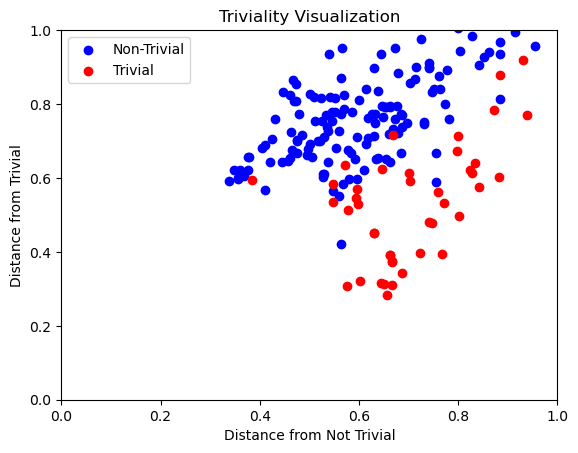

<Figure size 800x600 with 0 Axes>

In [164]:
# Visualise the distances in a graph

# Scatter plot
trivial_points = checkmate_df[(checkmate_df['is_trivial'] == 1)&(checkmate_df['type']!='image')]
non_trivial_points = checkmate_df[(checkmate_df['is_trivial'] == 0)&(checkmate_df['type']!='image')]

# Scatter plot for non-trivial points (on top)
plt.scatter(non_trivial_points['distance_from_not_trivial'], non_trivial_points['distance_from_trivial'], c='blue', label='Non-Trivial')

# Scatter plot for trivial points (below non-trivial points)
plt.scatter(trivial_points['distance_from_not_trivial'], trivial_points['distance_from_trivial'], c='red', label='Trivial')

# Add labels and title
plt.xlabel('Distance from Not Trivial')
plt.ylabel('Distance from Trivial')
plt.title('Triviality Visualization')


# Set the same scale for x-axis and y-axis
plt.xlim(0, 1)
plt.ylim(0, 1)

# Set legend
plt.legend()

# Increase the figure size
plt.figure(figsize=(8, 6))

# Display the plot
plt.show()

In [159]:
# Trivial but closer to non-trivial
checkmate_df[(checkmate_df['is_trivial'] == 1) & (checkmate_df['distance_from_trivial'] >= checkmate_df['distance_from_not_trivial'])]

,text,taggedCategory,type,isMachineCategorised,truthScore,is_trivial,embedding,distance_from_not_trivial,distance_from_trivial
65,scam?,Trivial,text,True,NaN,True,"[-0.09376836, -0.023098141, -0.055983767, -0.0...",0.548171,0.582892
84,Yes should be OK\nLet me check n confirm\nI th...,Trivial,text,False,NaN,True,"[-0.053946003, -0.037674546, -0.051822018, -0....",0.668511,0.717290
166,Sending a note to myself to stresstest the sca...,Trivial,text,False,NaN,True,"[-0.09815832, -0.025841225, -0.09299754, 0.014...",0.384752,0.594931
190,Are you there? Are you still in Singapore？,Trivial,text,False,NaN,True,"[0.0966414, 0.013987148, 0.081768185, 0.055710...",0.571352,0.635492


In [167]:
# Non_trivial but closer to trivial
# 16 counts
# 7/16 unsure
# 6/16 contain images
# 4/16 (not images and not unsure) fall into close call <0.02
checkmate_df[(checkmate_df['is_trivial'] == 0) & (checkmate_df['distance_from_trivial'] <= checkmate_df['distance_from_not_trivial']) & (checkmate_df['type']!='image')].sort_values('distance_from_trivial')

,text,taggedCategory,type,isMachineCategorised,truthScore,is_trivial,embedding,distance_from_not_trivial,distance_from_trivial
15,"Hello 😊😊\nSorry to bother you, Please are you....",Unsure,text,False,4.000000,False,"[0.061421927, 0.018574929, 0.074975155, 0.0318...",0.564274,0.421690
151,[SHIN MIN CONTEST] Happycall Jumbo 双面锅等你赢取！翻阅到...,Unsure,text,False,NaN,False,"[-0.0065403786, 0.16876857, 0.041264467, -0.00...",0.559574,0.551787
66,"Hello \nsorry to bother you, is this Kevin Wong ?",Unsure,text,False,NaN,False,"[0.047588956, -0.001526767, 0.07095358, 0.0015...",0.755665,0.589375
54,https://ramilsin.shadowsite.site/?utm_creative...,Unsure,text,False,0.666667,False,"[-0.08615311, 0.09739955, -0.10971462, 0.00651...",0.661733,0.643188
4,"🚩🚩🚩 *""You flag, we check""* 🔍🔍🔍\n\nNot sure if ...",Info/News/Opinion,text,False,5.000000,False,"[-0.040913586, -0.06391054, -0.09588483, -0.02...",0.654617,0.652103
154,88346 is your Facebook confirmation code,Unsure,text,False,NaN,False,"[-0.0069794655, -0.00924805, -0.06504133, 0.02...",0.684697,0.667105
9,https://forceforgood.insead.edu/give\n\n#tookl...,Unsure,text,False,4.500000,False,"[0.010409027, 0.051272172, -0.07328606, 0.0210...",0.755787,0.668824
55,9/11 attack was a scam,Info/News/Opinion,text,False,0.066667,False,"[-0.05884595, 0.030991387, -0.046663105, 0.015...",0.782242,0.759581
35,Doctors Honoured by Hitler https://youtube.com...,Info/News/Opinion,text,False,2.500000,False,"[0.0001370665, 0.10838188, -0.09572985, 0.0100...",0.884008,0.814972
48,Ionizing radiation can affect the atoms in all...,Info/News/Opinion,text,False,1.214286,False,"[-0.0375375, 0.059639283, 0.0807122, 0.0842406...",1.044922,1.016569


In [155]:
spam_df['embedding'] = spam_df['text'].apply(lambda x: model.encode(x))

In [156]:
spam_df['distance_from_not_trivial'] = spam_df['embedding'].apply(lambda x: cosine(rep_not_trivial, x))
spam_df['distance_from_trivial'] = spam_df['embedding'].apply(lambda x: cosine(rep_trivial, x))

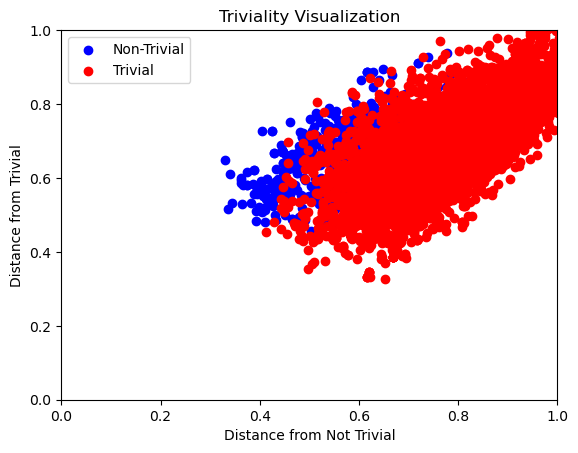

<Figure size 800x600 with 0 Axes>

In [157]:
# Visualise the distances in a graph

# Scatter plot
trivial_points = spam_df[spam_df['is_trivial'] == 1]
non_trivial_points = spam_df[spam_df['is_trivial'] == 0]

# Scatter plot for non-trivial points (on top)
plt.scatter(non_trivial_points['distance_from_not_trivial'], non_trivial_points['distance_from_trivial'], c='blue', label='Non-Trivial')

# Scatter plot for trivial points (below non-trivial points)
plt.scatter(trivial_points['distance_from_not_trivial'], trivial_points['distance_from_trivial'], c='red', label='Trivial')

# Add labels and title
plt.xlabel('Distance from Not Trivial')
plt.ylabel('Distance from Trivial')
plt.title('Triviality Visualization')


# Set the same scale for x-axis and y-axis
plt.xlim(0, 1)
plt.ylim(0, 1)

# Set legend
plt.legend()

# Increase the figure size
plt.figure(figsize=(8, 6))

# Display the plot
plt.show()

## Threshold Adjustment
Find the best fit line to separate the trivial and non trivial values based on the graph

In [199]:
def is_trivial_classifier(distance_from_not_trivial, distance_from_trivial, type):
    if type == 'image':
        return 0
    elif distance_from_not_trivial - 0.1 > distance_from_trivial:
        return 1
    else:
        return 0

In [200]:
checkmate_df['prediction'] = checkmate_df.apply(lambda x: is_trivial_classifier(x['distance_from_not_trivial'], x['distance_from_trivial'], x['type']), axis=1)

In [201]:
checkmate_predicted_vs_output = pd.concat([checkmate_df['text'], checkmate_df['is_trivial'], checkmate_df['prediction'], checkmate_df['taggedCategory']], axis=1)
# predicted_vs_output = predicted_vs_output.rename(columns={'is_trivial':'target', 'text':'prediction'})
checkmate_predicted_vs_output.columns = ['text', 'target','prediction','category']

print(checkmate_predicted_vs_output)

                                                  text  target  prediction  \
0                                                  nan   False           0   
1                                                  nan   False           0   
2                              Well done CheckMate 👏👏👏    True           1   
3    https://www.mas.gov.sg/news/media-releases/202...   False           0   
4    🚩🚩🚩 *"You flag, we check"* 🔍🔍🔍\n\nNot sure if ...   False           0   
..                                                 ...     ...         ...   
196  Keep losing other agent? looking for betting a...   False           0   
197  NO DEPOSIT REQUIRED\n98% Success Rate\n$500-50...   False           0   
198                         https://dbspaylah-sg.shop/   False           0   
199  Enjoy 4.28% p.a. for 6 months with POSB Bank F...   False           0   
200  Dear Customer \nWe inform you in writing that ...   False           0   

              category  
0    Info/News/Opinion  
1            

In [202]:
# Calculate the recall of this methodology
true_trivial = (checkmate_predicted_vs_output[(checkmate_predicted_vs_output['target']==True) & (checkmate_predicted_vs_output['prediction']==True)])
true_non_trivial = (checkmate_predicted_vs_output[(checkmate_predicted_vs_output['target']==False) & (checkmate_predicted_vs_output['prediction']==False)])

false_non_trivial = (checkmate_predicted_vs_output[(checkmate_predicted_vs_output['target']==True) & (checkmate_predicted_vs_output['prediction']==False)])
false_trivial = (checkmate_predicted_vs_output[(checkmate_predicted_vs_output['target']==False) & (checkmate_predicted_vs_output['prediction']==True)])

recall = len(true_non_trivial)/(len(true_non_trivial)+len(false_trivial))
checkmate_metric = len(true_trivial)/(len(true_trivial)+len(false_trivial))
accuracy = (len(true_trivial)+len(true_non_trivial))/(len(true_trivial)+len(true_non_trivial)+len(false_trivial)+len(false_non_trivial))

In [203]:
print(f'Recall is: {recall*100}%')
print(f'Accuracy is: {accuracy*100}%')
print(f'Checkmate Metric is: {checkmate_metric*100}%')

print(f'true_trivial is: {len(true_trivial)}')
print(f'true_non_trivial is: {len(true_non_trivial)}')
print(f'false_non_trivial is: {len(false_non_trivial)}')
print(f'false_trivial is: {len(false_trivial)}')

Recall is: 98.71794871794873%
Accuracy is: 91.04477611940298%
Checkmate Metric is: 93.54838709677419%
true_trivial is: 29
true_non_trivial is: 154
false_non_trivial is: 16
false_trivial is: 2


In [204]:
false_trivial

,text,target,prediction,category
15,"Hello 😊😊\nSorry to bother you, Please are you....",False,1,Unsure
66,"Hello \nsorry to bother you, is this Kevin Wong ?",False,1,Unsure


Able to reduce the number of trivials checked by 64% and the two false trivials are actually trivials

In [206]:
torch.save(rep_not_trivial, '../../models/representative_tensors/NT_20MAY2023.pt')
torch.save(rep_trivial, '../../models/representative_tensors/T_20MAY2023.pt')

## Consolidated Example

In [207]:
# Get representative tensor from file
rep_NT = torch.load('../../models/representative_tensors/NT_20MAY2023.pt')
rep_T = torch.load('../../models/representative_tensors/T_20MAY2023.pt')

In [205]:
model = SentenceTransformer('sentence-transformers/multi-qa-MiniLM-L6-cos-v1')

In [219]:
text = 'Hello, thank you for your help checkmate'
embedding = model.encode(text)
distance_from_not_trivial = cosine(rep_NT, embedding)
distance_from_trivial = cosine(rep_T, embedding)
assigned_type = 'text'

In [220]:
def is_trivial_classifier(distance_from_not_trivial, distance_from_trivial, type):
    if type == 'image':
        return 0
    elif distance_from_not_trivial - 0.1 > distance_from_trivial:
        return 1
    else:
        return 0

In [221]:
prediction = is_trivial_classifier(distance_from_not_trivial, distance_from_trivial, assigned_type)
prediction

1

## Future: Continuously Update of Representative vector based on the data collected